In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import pandas as pd
import configs
from scipy.optimize import curve_fit

# Arguments

In [2]:
corr = 0.25

# Load Meta-RL results

In [3]:
model_name, path_to_pkl, eval_dset_path = configs.get_model_paths(corr, "tree_maze")

epoch=34-val_loss=0.174876.ckpt


In [4]:
path_to_pkl = os.path.join(os.path.dirname(path_to_pkl), 'eval_results_offline_by_query_type.pkl')

In [5]:
with open(path_to_pkl, "rb") as f:
    data = pickle.load(f)
metarl_df = pd.DataFrame(data)
metarl_df.head()

,model,return,environment,experienced_reward,context_length,query_type,path_length_scaled,returns_scaled
0,Opt,91.600000,0,8,800,seen_states_pre_reward,0.000893,0.999107
1,Learner (temp=2),0.990633,0,8,800,seen_states_pre_reward,0.989195,0.010805
2,Learner (temp=1),1.000000,0,8,800,seen_states_pre_reward,0.989093,0.010907
3,Learner (greedy),1.000000,0,8,800,seen_states_pre_reward,0.989093,0.010907
4,Opt,91.950000,0,8,800,seen_states_post_reward,-0.002925,1.002925


# Load DQN results

In [8]:
engram_dir = "/n/holylfs06/LABS/krajan_lab/Lab/cfang/icl-maze/"
wandb_project = "tree_maze_qlearning"
env_name = f"cntree_layers7_bprob1.0_corr{corr}_state_dim10_envs1000_H1600_explore"
model_name = "dqn_nlayers4_gamma0.9_target10_lr1e-05"
path_to_pkl = os.path.join(
    engram_dir, wandb_project, env_name, "models", model_name,
    "eval_results_offline_by_query_type.pkl")

# Load Q table results

In [9]:
engram_dir = "/n/holylfs06/LABS/krajan_lab/Lab/cfang/icl-maze/"
wandb_project = "tree_maze_qlearning"
env_name = f"cntree_layers7_bprob1.0_corr{corr}_state_dim10_envs1000_H1600_explore"
model_name = "q_table_gamma0.8"
path_to_pkl = os.path.join(
    engram_dir, wandb_project, env_name, "models", model_name,
    "eval_results_offline_by_query_type.pkl")

In [10]:
with open(path_to_pkl, "rb") as f:
    data = pickle.load(f)
qtable_df = pd.DataFrame(data)
qtable_df = qtable_df.rename(columns={'returns': 'return'})
qtable_df['model'] = 'Q Table'
qtable_df.head()

,return,environment,experienced_reward,context_length,query_type,model
0,91.75,0,8,1000,seen_states_pre_reward,Q Table
1,91.80,0,8,1000,seen_states_post_reward,Q Table
2,25.40,0,8,1000,unseen_states,Q Table
3,92.45,1,29,1000,seen_states_pre_reward,Q Table
4,95.00,1,29,1000,seen_states_post_reward,Q Table


# Plot all results

In [11]:
# Concatenate the dataframes
df = pd.concat([metarl_df, dqn_df, qtable_df], ignore_index=True)


In [12]:
np.unique(df['context_length'])

array([1000])

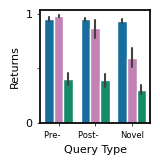

In [16]:
# Create bar plot
plt.figure(figsize=(1.7, 1.75))
sns.barplot(
    data=df, x='query_type', y='return', hue='model',
    hue_order=['Learner (temp=2)', 'Q Table', 'DQN'],
    palette=['C0', 'C4', 'C2'],
    legend=None)
plt.xticks([0,1,2], ['Pre-     ', 'Post-     ', 'Novel'], fontsize=6) #["States Seen Before Reward", "States Seen After Reward", "Unseen States"], rotation=45)
plt.yticks([0,47,94], ['0', '', '1'], fontsize=8)
plt.xlabel('Query Type', fontsize=8)
plt.ylabel('Returns', fontsize=8)
plt.tight_layout()
plt.savefig('figs/2f.png', transparent=True, dpi=300)
plt.savefig('figs/2f.svg', transparent=True, dpi=300)
plt.show()
